# COVID-19 Risk Classification Project Visualizations
This notebook presents the visualizations for the U.S. COVID-19 risk classification project.

## 1. Setup
Import libraries and load the dataset.

In [8]:
# Install missing packages
%pip install pandas matplotlib

import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('../data/cleaned_usa_covid_data.csv', parse_dates=['date'])


[notice] A new release of pip is available: 23.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## 2. Data Overview
Display the first few rows and data summary.

In [9]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,7_day_avg_cases,7_day_avg_deaths
0,USA,North America,United States,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,78.86,0.926,338289856,-1914.9,-3.09,-3.09,-5.700091,NaN,NaN
1,USA,North America,United States,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,78.86,0.926,338289856,NaN,NaN,NaN,NaN,NaN,NaN
2,USA,North America,United States,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,78.86,0.926,338289856,NaN,NaN,NaN,NaN,NaN,NaN
3,USA,North America,United States,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,78.86,0.926,338289856,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,North America,United States,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,78.86,0.926,338289856,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1674 entries, 0 to 1673
Data columns (total 68 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   iso_code                                    1674 non-null   object        
 1   continent                                   1674 non-null   object        
 2   location                                    1674 non-null   object        
 3   date                                        1674 non-null   datetime64[ns]
 4   total_cases                                 1674 non-null   float64       
 5   new_cases                                   1232 non-null   float64       
 6   new_cases_smoothed                          1227 non-null   float64       
 7   total_deaths                                1674 non-null   float64       
 8   new_deaths                                  1674 non-null   float64       
 9   new_deat

## 3. Univariate Analysis
Distribution of key variables: new_cases, total_cases, hosp_patients_per_million, icu_patients_per_million.

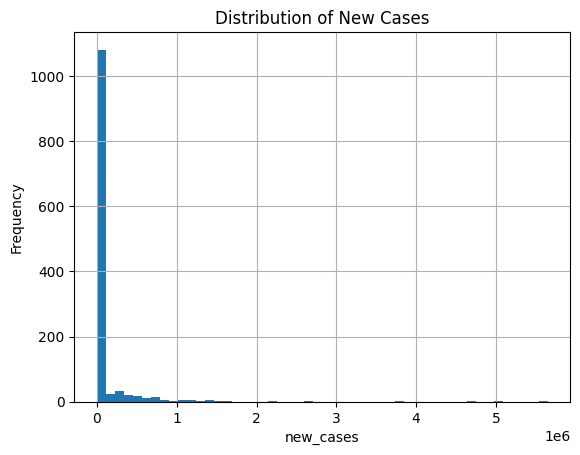

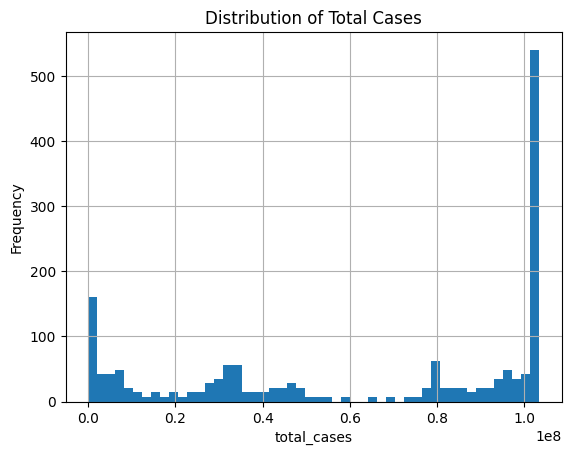

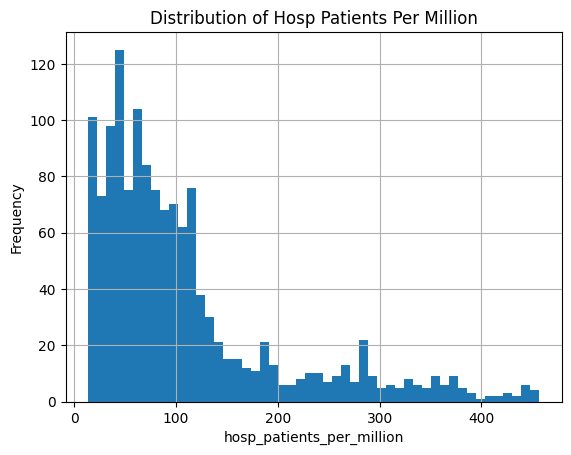

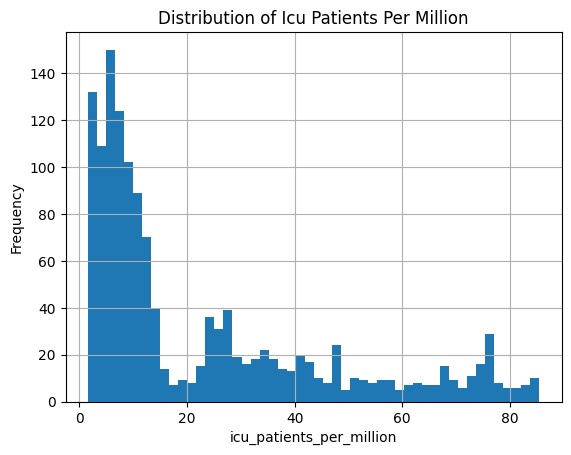

In [11]:
for col in ['new_cases', 'total_cases', 'hosp_patients_per_million', 'icu_patients_per_million']:
    plt.figure()
    df[col].dropna().hist(bins=50)
    plt.title(f"Distribution of {col.replace('_', ' ').title()}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## 4. Time Series Analysis
Plot daily new cases and 7-day rolling average.

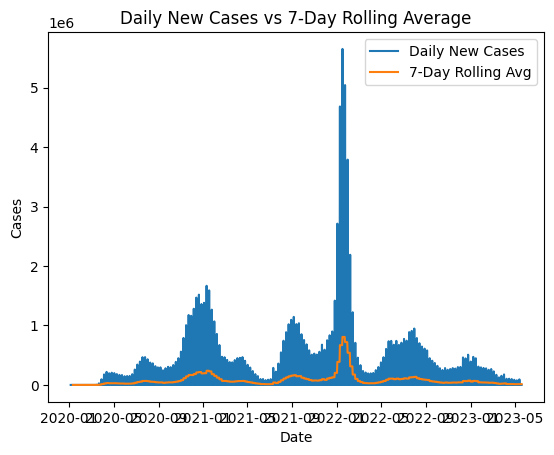

In [12]:
plt.figure()
plt.plot(df['date'], df['new_cases'], label='Daily New Cases')
plt.plot(df['date'], df['7_day_avg_cases'], label='7-Day Rolling Avg')
plt.title('Daily New Cases vs 7-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.show()

## 5. Bivariate Analysis
Scatterplots to explore relationships between pairs of variables.

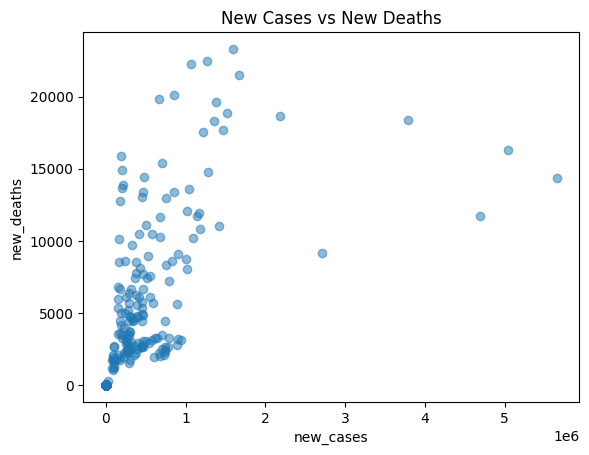

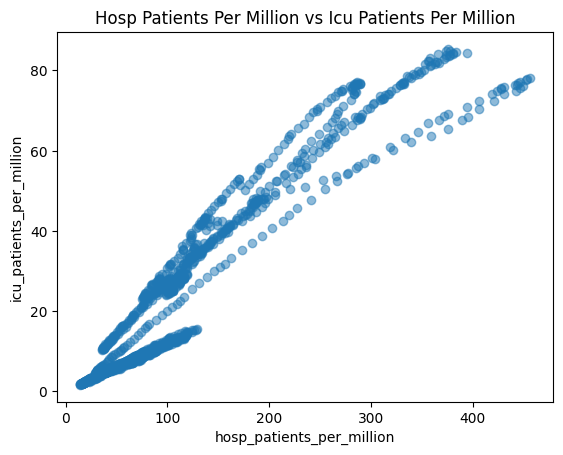

In [14]:
pairs = [('new_cases', 'new_deaths'), ('hosp_patients_per_million', 'icu_patients_per_million')]
for x, y in pairs:
    plt.figure()
    plt.scatter(df[x], df[y], alpha=0.5)
    plt.title(f"{x.replace('_', ' ').title()} vs {y.replace('_', ' ').title()}")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

## 6. Correlation Matrix
Heatmap of correlation between selected variables.

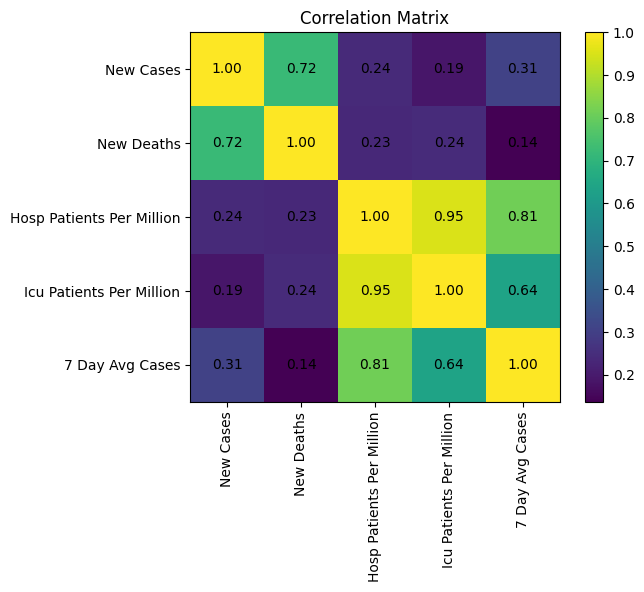

In [15]:
vars = ['new_cases', 'new_deaths', 'hosp_patients_per_million', 'icu_patients_per_million', '7_day_avg_cases']
corr = df[vars].corr()
plt.figure()
im = plt.imshow(corr, interpolation='nearest')
plt.title('Correlation Matrix')
plt.colorbar(im)
plt.xticks(range(len(vars)), [v.replace('_',' ').title() for v in vars], rotation=90)
plt.yticks(range(len(vars)), [v.replace('_',' ').title() for v in vars])
for i in range(len(vars)):
    for j in range(len(vars)):
        plt.text(j, i, f'{corr.iat[i,j]:.2f}', ha='center', va='center')
plt.show()